In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_excel("Data_Train.xlsx")

In [44]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [46]:
# Checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [47]:
# Making a copy of dataframe
df_new=df.copy()

In [48]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [49]:
# Dropping null values 
df_new.dropna(inplace=True)

In [50]:
df_new.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [51]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [52]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [53]:
# Converting Datatypes of Date_of_Journey ,Dep_Time,Arrival_Time    
def convertdtype(col):
    df_new[col]=pd.to_datetime(df_new[col])

In [54]:
lst=['Date_of_Journey','Dep_Time','Arrival_Time']
for feature in lst:
    convertdtype(feature)

In [55]:
df_new.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [56]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-01 05:50:00,2024-03-01 13:15:00,7h 25m,2 stops,No info,7662


In [57]:
# Analysing Date of Journey feature
df_new['Month']=df_new['Date_of_Journey'].dt.month
df_new['Day']=df_new['Date_of_Journey'].dt.day
df_new['Year']=df_new['Date_of_Journey'].dt.year

In [58]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-01 05:50:00,2024-03-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [59]:
df_new.drop(['Date'],inplace=True,axis=1)

KeyError: "['Date'] not found in axis"

In [60]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-01 05:50:00,2024-03-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [61]:
# Analysing Departure time feature
df_new['Dep_time_Hr']=df_new['Dep_Time'].dt.hour
df_new['Dep_time_Minu']=df_new['Dep_Time'].dt.minute

In [62]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-01 05:50:00,2024-03-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [63]:
# Analysing Arrival_Time feature
df_new['Arrival_Time_Hr']=df_new['Arrival_Time'].dt.hour
df_new['Arrival_Time_Min']=df_new['Arrival_Time'].dt.minute

In [64]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-01 05:50:00,2024-03-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [65]:
# Dropping Route,Dep_Time and Arrival_Time features
df_new.drop(['Route','Dep_Time','Arrival_Time'],inplace=True,axis=1)

In [66]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [67]:
# Analysing Duration columns
df_new['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [68]:
# Adding Hour and Minutes if it is not there
def checking_hr_min(col):
    if 'm' not in col:
        col=col+' '+'0m'
    elif 'h' not in col:
        col='0h'+' '+col
    
    return col

In [69]:
df_new["Duration"]=df_new["Duration"].apply(checking_hr_min)

In [70]:
df_new["Duration hours"]=df_new["Duration"].apply(lambda x:int(x.split(' ')[0][0:-1]))
df_new["Duration hours"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration hours, Length: 10682, dtype: int64

In [71]:
df_new["Duration minutes"]=df_new["Duration"].apply(lambda x:int(x.split(' ')[1][0:-1]))
df_new["Duration minutes"]

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration minutes, Length: 10682, dtype: int64

In [72]:
df_new["Duration minutes"]

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration minutes, Length: 10682, dtype: int64

In [73]:
df_new.drop(['Duration_hour'],axis=1,inplace=True)

KeyError: "['Duration_hour'] not found in axis"

In [74]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [75]:
df_new.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Month', 'Day', 'Year',
       'Dep_time_Hr', 'Dep_time_Minu', 'Arrival_Time_Hr', 'Arrival_Time_Min',
       'Duration hours', 'Duration minutes'],
      dtype='object')

In [76]:
# 2h 50m
# 2*60+50*1

In [77]:
# Converting Duration to Minutes
df_new['Duration_in_minutes']=df_new['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df_new['Duration_in_minutes']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_minutes, Length: 10682, dtype: int64

<AxesSubplot:xlabel='Duration_in_minutes', ylabel='Price'>

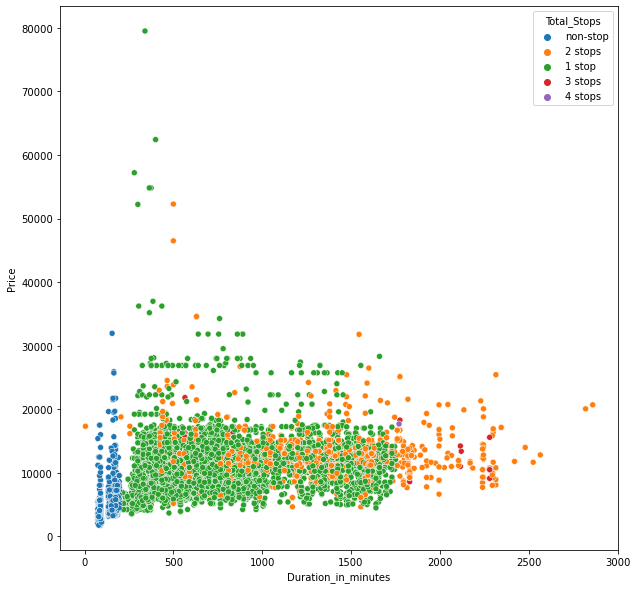

In [78]:
# Relationship btw Duration_in_minutes and Price
plt.figure(figsize=(10,10))
sns.scatterplot(x="Duration_in_minutes",y="Price",hue="Total_Stops",data=df_new)

In [79]:
df_new.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes,Duration_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45,285


In [80]:
df_new.drop(['Duration_in_minutes'],axis=1,inplace=True)

In [81]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [82]:
# Analysing Total Stops feature
df_new['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [83]:
replace_dict={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df_new['Total_Stops'].replace(replace_dict,inplace=True)

In [84]:
df_new['Total_Stops'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [85]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,2h 50m,0,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,2019-01-05,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [86]:
df_new.drop(['Date_of_Journey'],axis=1,inplace=True)

In [87]:
df_new.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,5,50,13,15,7,25


In [88]:
df_new['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [89]:
df_new.drop(['Additional_Info'],axis=1,inplace=True)

In [90]:
df_new.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25


In [91]:
df_new.drop(['Duration'],axis=1,inplace=True)

In [92]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25


In [93]:
# Analysing Source Feature
df_new['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [94]:
one_hot_encoding=pd.get_dummies(df_new['Source'],prefix='Source')
one_hot_encoding

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [95]:
df_new=pd.concat([df_new,one_hot_encoding],axis=1)

In [96]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,3,24,2019,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,0,0,0,1,0


In [97]:
# Analysing Destination Feature
df_new['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [98]:
one_hot_encoding=pd.get_dummies(df_new['Destination'],prefix='Destination')
one_hot_encoding

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [99]:
df_new=pd.concat([df_new,one_hot_encoding],axis=1)

In [100]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,2019,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,...,0,0,1,0,1,0,0,0,0,0


In [101]:
df_new.drop(['Source','Destination'],axis=1,inplace=True)

In [102]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Year,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,3,24,2019,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,2019,5,50,13,15,...,0,0,1,0,1,0,0,0,0,0


In [103]:
df_new['Year'].unique()

array([2019], dtype=int64)

In [104]:
df_new.drop(['Year'],axis=1,inplace=True)

In [105]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0


In [106]:
# Analysing Airline Features
df_new['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [107]:
df_new['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [108]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0


In [109]:
# Applying labelEncoding in Airline features

from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

df_new["Airline_Encoded"]=lbl_encoder.fit_transform(df_new['Airline'])

In [110]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Encoded
0,IndiGo,0,3897,3,24,22,20,1,10,2,...,0,0,0,0,0,0,0,0,1,3
1,Air India,2,7662,1,5,5,50,13,15,7,...,0,1,0,1,0,0,0,0,0,1


In [111]:
df_new['Airline_Encoded'].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [112]:
# Dropping Airline Features
df_new.drop(['Airline'],axis=1,inplace=True)

In [113]:
df_new.head(2)

,Total_Stops,Price,Month,Day,Dep_time_Hr,Dep_time_Minu,Arrival_Time_Hr,Arrival_Time_Min,Duration hours,Duration minutes,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_Encoded
0,0,3897,3,24,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,1,3
1,2,7662,1,5,5,50,13,15,7,25,...,0,1,0,1,0,0,0,0,0,1


In [114]:
# Spliting into X(Independent variable) and Y(target variable)

X=df_new.drop(['Price'],axis=1)
Y=df_new['Price']

In [115]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [140]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [141]:
# Applying Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predictions=rf.predict(X_test)

In [118]:
print(predictions)

[16765.66        7039.45        8869.55       ...  6580.27
 12873.92666667 13164.87833333]


In [142]:
from sklearn import metrics

In [120]:
metrics.r2_score(Y_test,predictions)*100

76.0031231085049

In [121]:
# Applying Decison Tree Model
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
predict=dt.predict(X_test)

In [122]:
print(predict)

[16840.  9069.  9397. ...  7452. 13339. 14335.]


In [123]:
metrics.r2_score(Y_test,predict)*100

66.10764246551561

In [124]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train,Y_train)
predict=lr.predict(X_test)

In [125]:
print(predict)

[13125.88494054 10203.98839041 11100.02679584 ...  8246.72529959
  8387.77780464  9779.37732335]


In [126]:
metrics.r2_score(Y_test,predict)*100

46.547244879754814

In [127]:
# KNN model

from sklearn.neighbors import KNeighborsRegressor

knn= KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train,Y_train)
predict=knn.predict(X_test)

In [128]:
print(predict)

[16315.   5158.2  8441.6 ...  6471.8  7535.8 11467.6]


In [129]:
metrics.r2_score(Y_test,predict)*100

58.523478835524536

In [130]:
#Hypertuning ML model (Random Forest)

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
reg_rf=RandomForestRegressor()

In [133]:
np.linspace(start=100,stop=1200,num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [134]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [ ]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [ ]:
random_grid

In [ ]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=5)
rf_random

In [ ]:
rf_random.fit(X_train,Y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_